## **Basic descriptive statistics**. Part 2: Examining global chromatin accessibility of peaks across cell types ##
___

### 0. Importing Dependencies and data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
refined_ATAC_data = pd.read_csv("refined_ATAC.csv")

In [3]:
refined_ATAC_data.head()

,ImmGenATAC1219.peakID,chrom,Summit,mm10.60way.phastCons_scores,_-log10_bestPvalue,Included.in.systematic.analysis,TSS,genes.within.100Kb,Sample ID,Signal
0,ImmGenATAC1219.peak_1,chr1,3020786,0.00,0.56,NaN,NaN,NaN,preT.DN1.Th,0.11
1,ImmGenATAC1219.peak_2,chr1,3087226,0.00,0.50,NaN,NaN,NaN,preT.DN1.Th,0.77
2,ImmGenATAC1219.peak_3,chr1,3120109,0.07,10.80,1.0,NaN,NaN,preT.DN1.Th,0.40
3,ImmGenATAC1219.peak_4,chr1,3121485,0.15,3.02,1.0,NaN,NaN,preT.DN1.Th,0.46
4,ImmGenATAC1219.peak_5,chr1,3372787,0.03,1.31,NaN,NaN,NaN,preT.DN1.Th,0.77


___
### 1. Computing descriptive statistics

In [4]:
peak_stats_df = (
    refined_ATAC_data
    .groupby("ImmGenATAC1219.peakID")["Signal"]
    .agg(Mean="mean", Median="median", SD="std")
    .reset_index()
)
peak_stats_df["CV"] = peak_stats_df["SD"] / peak_stats_df["Mean"]

len(peak_stats_df["ImmGenATAC1219.peakID"])

512595

In [5]:
# Note: I was wondering why the peaks are not in chronological order. Apparently, the .groupby function sorts them as strings. That's why we have the 1s first (1, 10, 100...)
peak_stats_df.head()

,ImmGenATAC1219.peakID,Mean,Median,SD,CV
0,ImmGenATAC1219.peak_1,0.807586,0.71,0.720603,0.892293
1,ImmGenATAC1219.peak_10,1.126552,0.73,1.571949,1.395363
2,ImmGenATAC1219.peak_100,1.112069,1.06,0.640811,0.576233
3,ImmGenATAC1219.peak_1000,0.885172,0.87,0.740471,0.836527
4,ImmGenATAC1219.peak_10000,0.997931,0.94,0.730295,0.731809


In [6]:
# To sort them numerically, we need to extract the numerical part in an extra step.
peak_stats_df["peak_num"] = peak_stats_df["ImmGenATAC1219.peakID"].str.extract(r'_(\d+)$').astype(int)
peak_stats_df = peak_stats_df.sort_values("peak_num").drop(columns="peak_num")
peak_stats_df = peak_stats_df.reset_index(drop=True)

peak_stats_df.head()

,ImmGenATAC1219.peakID,Mean,Median,SD,CV
0,ImmGenATAC1219.peak_1,0.807586,0.71,0.720603,0.892293
1,ImmGenATAC1219.peak_2,1.135517,0.90,0.920999,0.811084
2,ImmGenATAC1219.peak_3,0.688621,0.40,0.745341,1.082369
3,ImmGenATAC1219.peak_4,0.788621,0.53,0.882103,1.118539
4,ImmGenATAC1219.peak_5,0.697586,0.51,0.571493,0.819244


Looking at the extreme mean values, one could deduce that chromatin signal is variable. To see the extent of this, we will now visualize the data in histograms.

In [26]:
print(f"Minimum ATAC mean signal: {peak_stats_df['Mean'].min()}")
print(f"Maximum ATAC mean signal: {peak_stats_df['Mean'].max()}")

Minimum ATAC mean signal: 0.12586206896551724
Maximum ATAC mean signal: 705.7179310344827


___
### 2. Visualization of ATAC signal

<p align="justify">
The histograms below (Fig. 1-2) show that most peaks have low mean accessibility. Values as extreme as the one above (705.72) appear to be exceptions. Whether this has biological relevance or not, must be analyzed further. This would also suggest that small differences in accessibility could have a significant effect. The same considerations also apply for the coefficient of variance (Fig. 3)
</p>

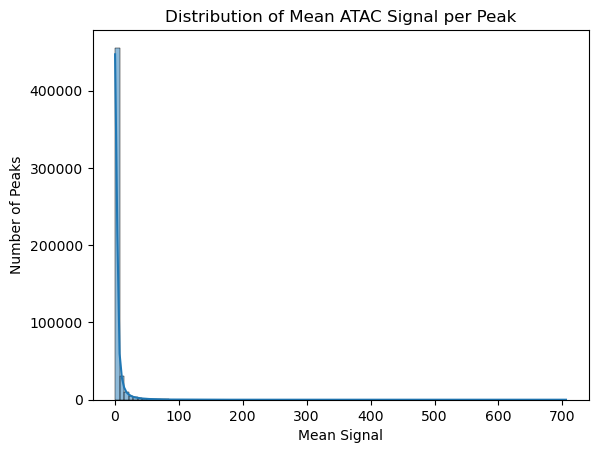

In [28]:
sns.histplot(peak_stats_df["Mean"], bins = 100, kde = True)
plt.title("Distribution of Mean ATAC Signal per Peak")
plt.xlabel("Mean Signal")
plt.ylabel("Number of Peaks")
plt.show()

**Fig. 1: Distribution of mean ATAC signal per peak across cell types**. The histogram shows that most peaks have a relatively low accessibility.

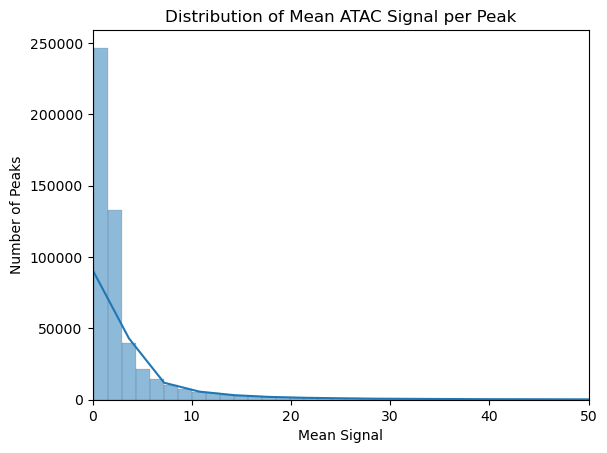

In [29]:
sns.histplot(peak_stats_df["Mean"], bins = 500, kde = True)
plt.title("Distribution of Mean ATAC Signal per Peak")
plt.xlabel("Mean Signal")
plt.ylabel("Number of Peaks")
plt.xlim(0, 50)
plt.show()

**Fig. 2: Distribution of mean ATAC signal per peak across cell types (Zoomed)**

Text(0.5, 1.0, 'Distribution of Coefficient of Variation (CV) per Peak')

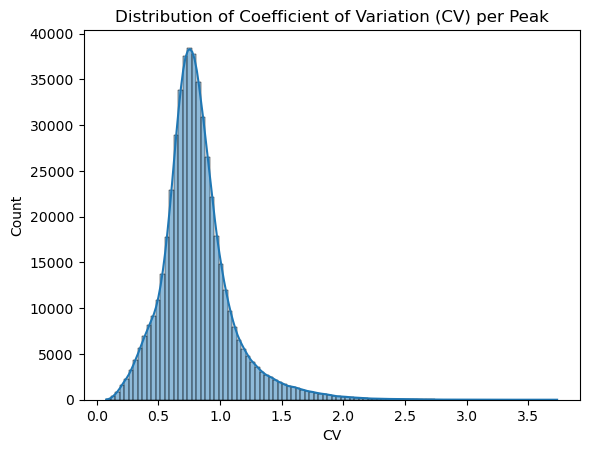

In [ ]:
sns.histplot(peak_stats_df["CV"], bins=100, kde=True)
plt.title("Distribution of Coefficient of Variation (CV) per Peak")

**Fig. 3**: Distribution of coefficient of variance (CV) per peak

___
### 3. Conclusion

<p align="justify">
In conclusion, chromatin accessibility across peaks is concentrated around lower values with some exceptions. Therefore, small changes could be significant for our project purposes and should be analyzed further. 
</p>